In [56]:
import os 
import pandas as pd 
import requests 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline
import numpy as np

In [57]:
PATH = r'/Users/thomasjaensch/Desktop/iris/' 
 
r = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data') 
 
with open(PATH + 'iris.data', 'w') as f: 
    f.write(r.text) 
 
os.chdir(PATH) 
 
df = pd.read_csv(PATH + 'iris.data', names=['sepal length', 'sepal width', 'petal length', 'petal width', 'class']) 
 
df[df['class']=='Iris-virginica'].count()

sepal length    50
sepal width     50
petal length    50
petal width     50
class           50
dtype: int64

In [58]:
virginica = df[(df['class']=='Iris-virginica')&(df['petal width']>2.2)] 
virginica

,sepal length,sepal width,petal length,petal width,class
100,6.3,3.3,6.0,2.5,Iris-virginica
109,7.2,3.6,6.1,2.5,Iris-virginica
114,5.8,2.8,5.1,2.4,Iris-virginica
115,6.4,3.2,5.3,2.3,Iris-virginica
118,7.7,2.6,6.9,2.3,Iris-virginica
120,6.9,3.2,5.7,2.3,Iris-virginica
135,7.7,3.0,6.1,2.3,Iris-virginica
136,6.3,3.4,5.6,2.4,Iris-virginica
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica


In [59]:
df.describe(percentiles=[.20,.40,.80,.90,.95])

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
20%,5.000000,2.700000,1.500000,0.200000
40%,5.600000,3.000000,3.900000,1.160000
50%,5.800000,3.000000,4.350000,1.300000
80%,6.520000,3.400000,5.320000,1.900000
90%,6.900000,3.610000,5.800000,2.200000
95%,7.255000,3.800000,6.100000,2.300000


In [60]:
df.corr()

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


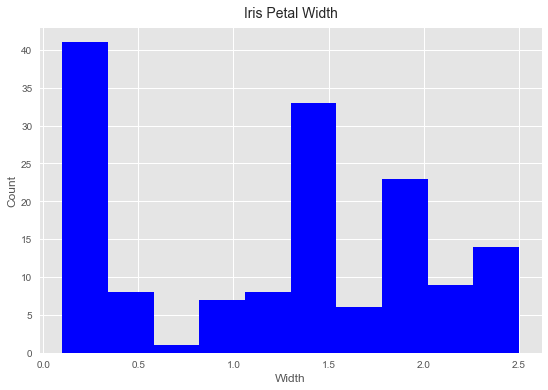

In [61]:
fig, ax = plt.subplots(figsize=(9,6))
ax.hist(df['petal width'], color='blue');
ax.set_ylabel('Count', fontsize=12)
ax.set_xlabel('Width', fontsize=12)
plt.title('Iris Petal Width', fontsize=14, y=1.01)

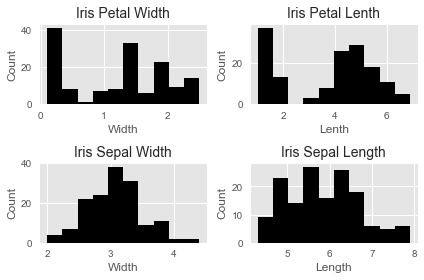

In [62]:
fig, ax = plt.subplots(2,2, figsize=(6,4)) 
 
ax[0][0].hist(df['petal width'], color='black');
ax[0][0].set_ylabel('Count', fontsize=12)
ax[0][0].set_xlabel('Width', fontsize=12)
ax[0][0].set_title('Iris Petal Width', fontsize=14, y=1.01)
 
ax[0][1].hist(df['petal length'], color='black');
ax[0][1].set_ylabel('Count', fontsize=12)
ax[0][1].set_xlabel('Lenth', fontsize=12)
ax[0][1].set_title('Iris Petal Lenth', fontsize=14, y=1.01)
 
ax[1][0].hist(df['sepal width'], color='black');
ax[1][0].set_ylabel('Count', fontsize=12)
ax[1][0].set_xlabel('Width', fontsize=12)
ax[1][0].set_title('Iris Sepal Width', fontsize=14, y=1.01)
 
ax[1][1].hist(df['sepal length'], color='black');
ax[1][1].set_ylabel('Count', fontsize=12)
ax[1][1].set_xlabel('Length', fontsize=12)
ax[1][1].set_title('Iris Sepal Length', fontsize=14, y=1.01)
plt.tight_layout()

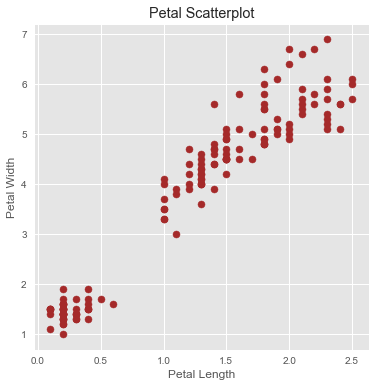

In [63]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(df['petal width'],df['petal length'], color='brown')
ax.set_ylabel('Petal Width')
ax.set_xlabel('Petal Length')
ax.set_title('Petal Scatterplot')

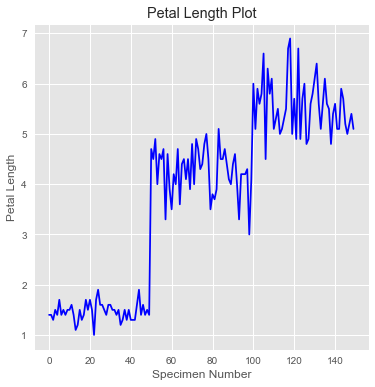

In [64]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(df['petal length'], color='blue')
ax.set_xlabel('Specimen Number')
ax.set_ylabel('Petal Length')
ax.set_title('Petal Length Plot')

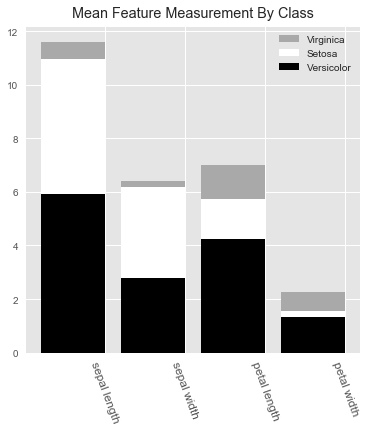

In [65]:
fig, ax = plt.subplots(figsize=(6,6))
bar_width = .8
labels = [x for x in df.columns if 'length' in x or 'width' in x]
ver_y = [df[df['class']=='Iris-versicolor'][x].mean() for x in
labels]
vir_y = [df[df['class']=='Iris-virginica'][x].mean() for x in
labels]
set_y = [df[df['class']=='Iris-setosa'][x].mean() for x in labels]
x = np.arange(len(labels))
ax.bar(x, vir_y, bar_width, bottom=set_y, color='darkgrey')
ax.bar(x, set_y, bar_width, bottom=ver_y, color='white')
ax.bar(x, ver_y, bar_width, color='black')
ax.set_xticks(x + (bar_width/2))
ax.set_xticklabels(labels, rotation=-70, fontsize=12);
ax.set_title('Mean Feature Measurement By Class', y=1.01)
ax.legend(['Virginica','Setosa','Versicolor'])

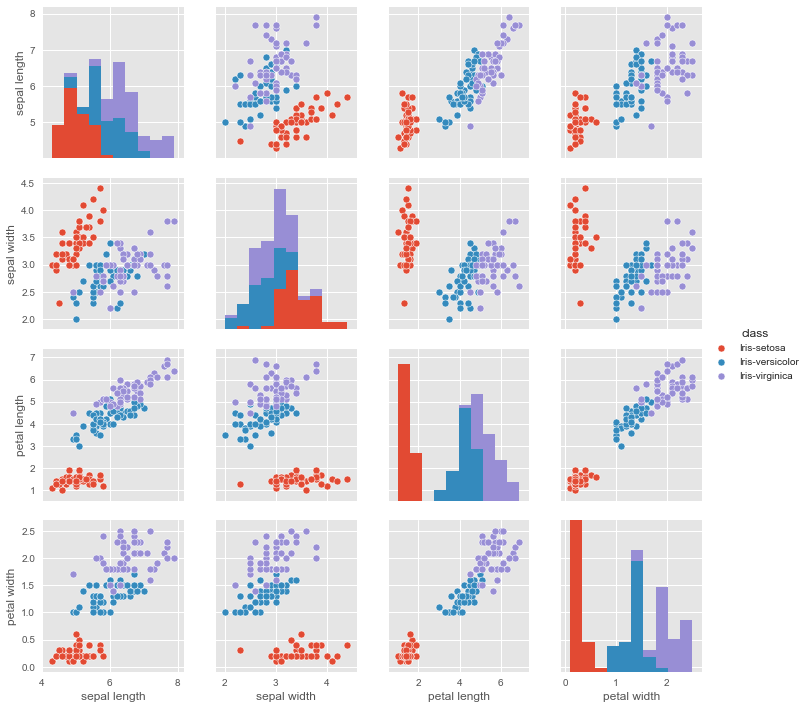

In [66]:
import seaborn as sns
sns.pairplot(df, hue="class")

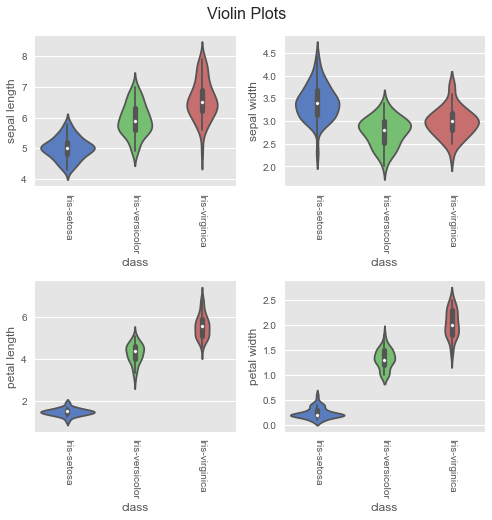

In [67]:
fig, ax = plt.subplots(2, 2, figsize=(7, 7))
sns.set(style='white', palette='muted')
sns.violinplot(x=df['class'], y=df['sepal length'], ax=ax[0,0])
sns.violinplot(x=df['class'], y=df['sepal width'], ax=ax[0,1])
sns.violinplot(x=df['class'], y=df['petal length'], ax=ax[1,0])
sns.violinplot(x=df['class'], y=df['petal width'], ax=ax[1,1])
fig.suptitle('Violin Plots', fontsize=16, y=1.03)
for i in ax.flat:
    plt.setp(i.get_xticklabels(), rotation=-90)
fig.tight_layout()

In [68]:
df['class'] = df['class'].map({'Iris-setosa': 'SET', 'Iris-virginica': 'VIR', 'Iris-versicolor': 'VER'}) 
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,SET
1,4.9,3.0,1.4,0.2,SET
2,4.7,3.2,1.3,0.2,SET
3,4.6,3.1,1.5,0.2,SET
4,5.0,3.6,1.4,0.2,SET
5,5.4,3.9,1.7,0.4,SET
6,4.6,3.4,1.4,0.3,SET
7,5.0,3.4,1.5,0.2,SET
8,4.4,2.9,1.4,0.2,SET
9,4.9,3.1,1.5,0.1,SET


In [69]:
df['wide petal'] = df['petal width'].apply(lambda v: 1 if v >= 1.3 else 0) 
df

,sepal length,sepal width,petal length,petal width,class,wide petal
0,5.1,3.5,1.4,0.2,SET,0
1,4.9,3.0,1.4,0.2,SET,0
2,4.7,3.2,1.3,0.2,SET,0
3,4.6,3.1,1.5,0.2,SET,0
4,5.0,3.6,1.4,0.2,SET,0
5,5.4,3.9,1.7,0.4,SET,0
6,4.6,3.4,1.4,0.3,SET,0
7,5.0,3.4,1.5,0.2,SET,0
8,4.4,2.9,1.4,0.2,SET,0
9,4.9,3.1,1.5,0.1,SET,0


In [70]:
df['petal area'] = df.apply(lambda r: r['petal length'] * r['petal width'], axis=1) 
df

,sepal length,sepal width,petal length,petal width,class,wide petal,petal area
0,5.1,3.5,1.4,0.2,SET,0,0.28
1,4.9,3.0,1.4,0.2,SET,0,0.28
2,4.7,3.2,1.3,0.2,SET,0,0.26
3,4.6,3.1,1.5,0.2,SET,0,0.30
4,5.0,3.6,1.4,0.2,SET,0,0.28
5,5.4,3.9,1.7,0.4,SET,0,0.68
6,4.6,3.4,1.4,0.3,SET,0,0.42
7,5.0,3.4,1.5,0.2,SET,0,0.30
8,4.4,2.9,1.4,0.2,SET,0,0.28
9,4.9,3.1,1.5,0.1,SET,0,0.15


In [71]:
df.applymap(lambda v: np.log(v) if isinstance(v, float) else v)

,sepal length,sepal width,petal length,petal width,class,wide petal,petal area
0,1.629241,1.252763,0.336472,-1.609438,SET,0,-1.272966
1,1.589235,1.098612,0.336472,-1.609438,SET,0,-1.272966
2,1.547563,1.163151,0.262364,-1.609438,SET,0,-1.347074
3,1.526056,1.131402,0.405465,-1.609438,SET,0,-1.203973
4,1.609438,1.280934,0.336472,-1.609438,SET,0,-1.272966
5,1.686399,1.360977,0.530628,-0.916291,SET,0,-0.385662
6,1.526056,1.223775,0.336472,-1.203973,SET,0,-0.867501
7,1.609438,1.223775,0.405465,-1.609438,SET,0,-1.203973
8,1.481605,1.064711,0.336472,-1.609438,SET,0,-1.272966
9,1.589235,1.131402,0.405465,-2.302585,SET,0,-1.897120


In [72]:
df.groupby('class').mean()

,sepal length,sepal width,petal length,petal width,wide petal,petal area
class,,,,,,
SET,5.006,3.418,1.464,0.244,0.0,0.3628
VER,5.936,2.770,4.260,1.326,0.7,5.7204
VIR,6.588,2.974,5.552,2.026,1.0,11.2962


In [73]:
df.groupby('class').describe()

petal area  petal length  petal width  sepal length  sepal width  \
class                                                                           
SET   count   50.000000     50.000000    50.000000     50.000000    50.000000   
      mean     0.362800      1.464000     0.244000      5.006000     3.418000   
      std      0.183248      0.173511     0.107210      0.352490     0.381024   
      min      0.110000      1.000000     0.100000      4.300000     2.300000   
      25%      0.265000      1.400000     0.200000      4.800000     3.125000   
      50%      0.300000      1.500000     0.200000      5.000000     3.400000   
      75%      0.420000      1.575000     0.300000      5.200000     3.675000   
      max      0.960000      1.900000     0.600000      5.800000     4.400000   
VER   count   50.000000     50.000000    50.000000     50.000000    50.000000   
      mean     5.720400      4.260000     1.326000      5.936000     2.770000   
      std      1.368403      0.469911     0.197753      0.516171     0.313798   
      min      3.300000      3.000000     1.000000      4.900000     2.000000   
      25%      4.860000      4.000000     1.200000      5.600000     2.525000   
      50%      5.615000      4.350000     1.300000      5.900000     2.800000   
      75%      6.750000      4.600000     1.500000      6.300000     3.000000   
      max      8.640000      5.100000     1.800000      7.000000     3.400000   
VIR   count   50.000000     50.000000    50.000000     50.000000    50.000000   
      mean    11.296200      5.552000     2.026000      6.588000     2.974000   
      std      2.157412      0.551895     0.274650      0.635880     0.322497   
      min      7.500000      4.500000     1.400000      4.900000     2.200000   
      25%      9.717500      5.100000     1.800000      6.225000     2.800000   
      50%     11.445000      5.550000     2.000000      6.500000     3.000000   
      75%     12.790000      5.875000     2.300000      6.900000     3.175000   
      max     15.870000      6.900000     2.500000      7.900000     3.800000   

             wide petal  
class                    
SET   count    50.00000  
      mean      0.00000  
      std       0.00000  
      min       0.00000  
      25%       0.00000  
      50%       0.00000  
      75%       0.00000  
      max       0.00000  
VER   count    50.00000  
      mean      0.70000  
      std       0.46291  
      min       0.00000  
      25%       0.00000  
      50%       1.00000  
      75%       1.00000  
      max       1.00000  
VIR   count    50.00000  
      mean      1.00000  
      std       0.00000  
      min       1.00000  
      25%       1.00000  
      50%       1.00000  
      75%       1.00000  
      max       1.00000

In [74]:
df.groupby('petal width')['class'].unique().to_frame()

,class
petal width,
0.1,[SET]
0.2,[SET]
0.3,[SET]
0.4,[SET]
0.5,[SET]
0.6,[SET]
1.0,[VER]
1.1,[VER]
1.2,[VER]


In [75]:
df.groupby('class')['petal width'].agg({'delta': lambda x: x.max() - x.min(), 'max': np.max, 'min': np.min})

,delta,max,min
class,,,
SET,0.5,0.6,0.1
VER,0.8,1.8,1.0
VIR,1.1,2.5,1.4


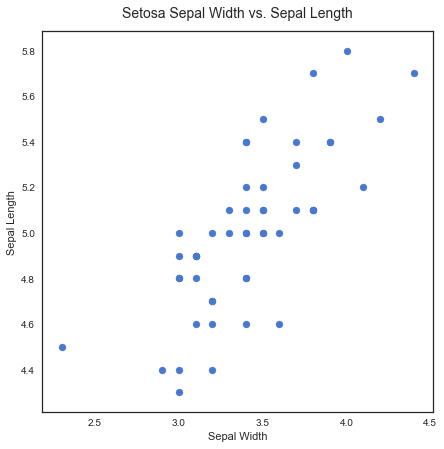

In [76]:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(df['sepal width'][:50], df['sepal length'][:50])
ax.set_ylabel('Sepal Length')
ax.set_xlabel('Sepal Width')
ax.set_title('Setosa Sepal Width vs. Sepal Length', fontsize=14,
y=1.02)

In [77]:
import statsmodels.api as sm
 
y = df['sepal length'][:50]
x = df['sepal width'][:50]
X = sm.add_constant(x)
 
results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           sepal length   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     60.52
Date:                Mon, 13 Feb 2017   Prob (F-statistic):           4.75e-10
Time:                        14:40:37   Log-Likelihood:                 2.0879
No. Observations:                  50   AIC:                           -0.1759
Df Residuals:                      48   BIC:                             3.648
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const           2.6447      0.305      8.660      

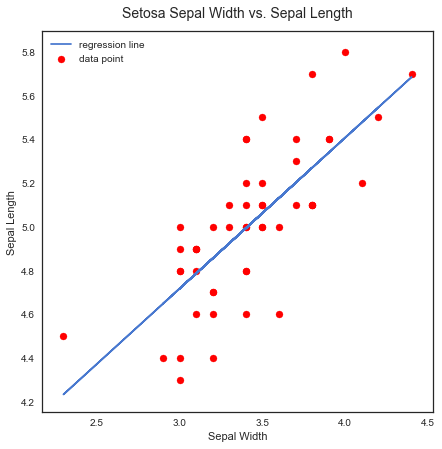

In [78]:
fig, ax = plt.subplots(figsize=(7,7))
ax.plot(x, results.fittedvalues, label='regression line')
ax.scatter(x, y, label='data point', color='r')
ax.set_ylabel('Sepal Length')
ax.set_xlabel('Sepal Width')
ax.set_title('Setosa Sepal Width vs. Sepal Length', fontsize=14,
y=1.02)
ax.legend(loc=2)

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
 
clf = RandomForestClassifier(max_depth=5, n_estimators=10)
 
X = df.ix[:,:4]
y = df.ix[:,4]
 
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=.3)
 
clf.fit(X_train,y_train)
 
y_pred = clf.predict(X_test)
 
rf = pd.DataFrame(list(zip(y_pred, y_test)), columns=['predicted',
'actual'])
rf['correct'] = rf.apply(lambda r: 1 if r['predicted'] ==
r['actual'] else 0, axis=1)
     
rf

,predicted,actual,correct
0,SET,SET,1
1,VER,VER,1
2,VIR,VIR,1
3,VER,VER,1
4,VER,VER,1
5,VIR,VIR,1
6,SET,SET,1
7,VIR,VIR,1
8,SET,SET,1
9,VER,VER,1


In [82]:
rf['correct'].sum()/rf['correct'].count()

1.0

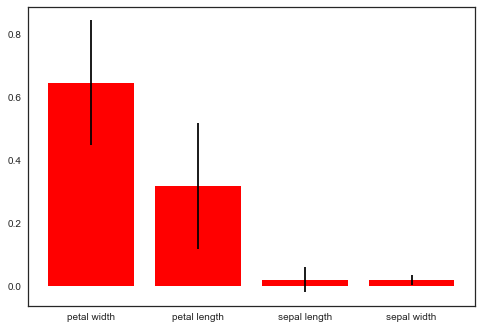

In [85]:
f_importances = clf.feature_importances_
f_names = df.columns[:4] 
f_std = np.std([tree.feature_importances_ for tree in
clf.estimators_], axis=0)
 
zz = zip(f_importances, f_names, f_std)
zzs = sorted(zz, key=lambda x: x[0], reverse=True)
 
imps = [x[0] for x in zzs]
labels = [x[1] for x in zzs]
errs = [x[2] for x in zzs]
 
plt.bar(range(len(f_importances)), imps, color="r", yerr=errs,
align="center")
plt.xticks(range(len(f_importances)), labels); 

In [86]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split
 
clf = OneVsRestClassifier(SVC(kernel='linear'))
 
X = df.ix[:,:4]
y = np.array(df.ix[:,4]).astype(str)
 
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=.3)
 
clf.fit(X_train,y_train)
 
y_pred = clf.predict(X_test)
 
rf = pd.DataFrame(list(zip(y_pred, y_test)), columns=['predicted',
'actual'])
rf['correct'] = rf.apply(lambda r: 1 if r['predicted'] ==
r['actual'] else 0, axis=1)
     
rf

,predicted,actual,correct
0,VER,VER,1
1,SET,SET,1
2,VIR,VIR,1
3,SET,SET,1
4,SET,SET,1
5,SET,SET,1
6,SET,SET,1
7,VER,VER,1
8,VIR,VIR,1
9,SET,SET,1


In [87]:
rf['correct'].sum()/rf['correct'].count()

1.0